## Neural Network Architecture

A neural network is composed of three main types of layers:

* **Input Layer:**
    * Receives raw data features.
    * Each feature corresponds to a node in the input layer.
    * No computations happen here; it just passes the data to the next layer.

* **Hidden Layers:**
    * Perform computations to learn patterns and representations.
    * Apply weights, biases, and activation functions to the inputs.
    * A network can have multiple hidden layers, making it a deep neural network (DNN).

* **Output Layer:**
    * Provides the final predictions (e.g., class probabilities or regression values).
    * The number of nodes in this layer depends on the type of task:
        * **Regression:** 1 node (continuous value)
        * **Binary Classification:** 1 node (probability)
        * **Multi-class Classification:** Number of classes

**Interactive Example (Conceptual):**

Imagine you're building a neural network to classify images of cats and dogs.

1. **Input Layer:** 
   * Each pixel in the image would be a node in the input layer.

2. **Hidden Layers:** 
   * The first hidden layer might identify edges and basic shapes.
   * Subsequent layers might learn more complex features like ears, whiskers, and fur patterns.

3. **Output Layer:** 
   * Would have two nodes: one for "cat" and one for "dog". 
   * The output of each node would represent the probability of the image being that animal.

**Note:** This is a simplified explanation. Real-world neural networks can be much more complex, with various architectures and activation functions.

## 2. Mathematical Concepts

### Forward Propagation

Data flows through the network as follows:

* **Weighted Sum:** 
    * `z = W * x + b` 
    * where:
        * `x`: Input features.
        * `W`: Weight matrix.
        * `b`: Bias vector.
        * `z`: Weighted sum.

* **Activation:** 
    * `a = σ(z)` 
    * where:
        * `σ`: Activation function (e.g., sigmoid, ReLU).
        * `a`: Output of the current layer (activation).

### Structure Example

**Input Layer:** `x = [x1, x2]`

**Hidden Layer:** 
* `z^(1) = W^(1) * x + b^(1)` 
* `a^(1) = σ(z^(1))`

**Output Layer:** 
* `z^(2) = W^(2) * a^(1) + b^(2)` 
* `a^(2) = σ(z^(2))` 

**Note:** This example demonstrates a simple feedforward neural network with one hidden layer. More complex networks can have multiple hidden layers with various activation functions.

**Interactive Example (Conceptual):**

* **Imagine a simple network for predicting house prices.**
    * **Input Layer:** Features like square footage, number of bedrooms, and location.
    * **Hidden Layer:** Learns combinations of these features to understand their impact on price (e.g., location x size).
    * **Output Layer:** Predicts the estimated house price.



### Code:

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Example Dataset (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR output

# Build a simple neural network
model = Sequential([
    Dense(2, input_dim=2, activation='relu', name='Hidden_Layer'),  # Hidden layer
    Dense(1, activation='sigmoid', name='Output_Layer')  # Output layer
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Predict
predictions = model.predict(X)
print("Predictions:", predictions)


Loss: 0.6929, Accuracy: 0.5000
1/1 [==============================] - 0s 45ms/step
Predictions: [[0.500091  ]
 [0.500091  ]
 [0.50248325]
 [0.5020695 ]]


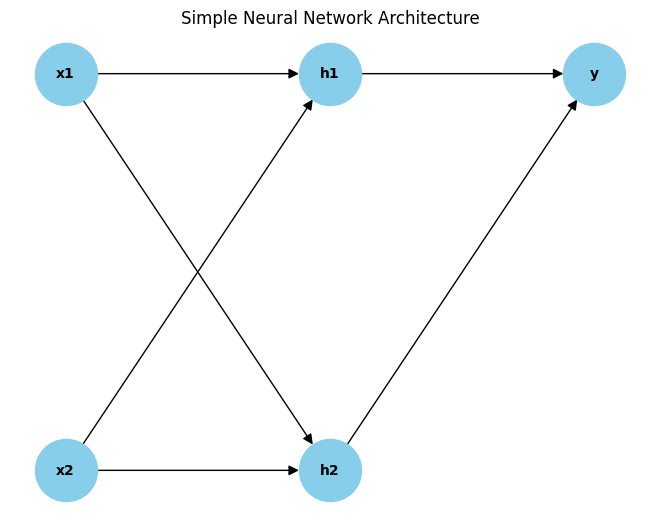

In [47]:
def plot_nn():
  G = nx.DiGraph()

  # Add nodes for input, hidden, and output layers
  layers = {
      'Input': ['x1', 'x2'],
      'Hidden': ['h1', 'h2'],
      'Output': ['y']
  }

  positions = {}
  for i, layer in enumerate(layers.keys()):
    for j, node in enumerate(layers[layer]):
      positions[node] = (i, -j)
      G.add_node(node, layer=layer)

  # Add edges between layers (modified to avoid loop)
  for input_node in layers['Input']:
    for hidden_node in layers['Hidden']:
      G.add_edge(input_node, hidden_node)
  for hidden_node in layers['Hidden']:
    for output_node in layers['Output']:
      G.add_edge(hidden_node, output_node)

  # Draw the network
  nx.draw(G, pos=positions, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=15)
  plt.title("Simple Neural Network Architecture")
  plt.show()

plot_nn()

In [7]:
'''
  Input Layer:          Hidden Layer:       Output Layer:
    x1 ───► h1 ───►
                        ───► h2 ───►            y
    x2 ───► h1 ───►
'''

'\nInput Layer:        Hidden Layer:          Output Layer:\nx1 ───► h1 ───►\n                  ───► h2 ───► y\nx2 ───► h1 ───►\n'

**Explanation**

* **Input Layer:**
    * Passes `x1` and `x2` directly to the hidden layer.

* **Hidden Layer:**
    * Applies **weights** and **biases** to the inputs (`x1` and `x2`).
    * Applies the **ReLU (Rectified Linear Unit)** activation function to introduce non-linearity.

* **Output Layer:**
    * Combines the outputs of the hidden neurons.
    * Applies the **sigmoid** activation function to produce an output between 0 and 1, representing the probability of the input belonging to the positive class in binary classification.

## Doubts

*The bias in a neural network is a critical component of the model. It acts as an additional parameter in neurons that helps the model better fit the data by enabling it to shift activation functions.*


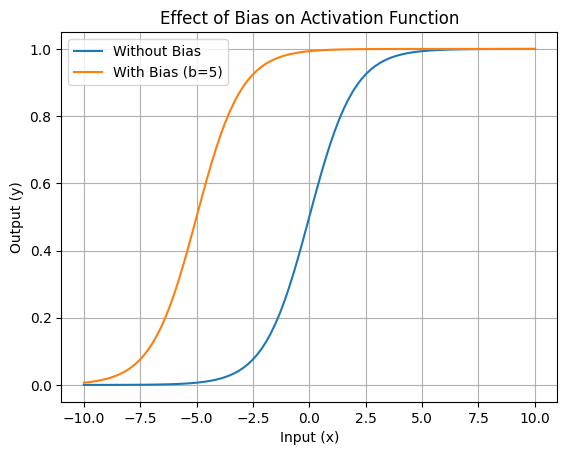

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define input
x = np.linspace(-10, 10, 100)

# Without bias
w = 1
b = 0
z_no_bias = w * x + b
y_no_bias = 1 / (1 + np.exp(-z_no_bias))  # Sigmoid activation

# With bias
b = 5
z_with_bias = w * x + b
y_with_bias = 1 / (1 + np.exp(-z_with_bias))  # Sigmoid activation

# Plot the results
plt.plot(x, y_no_bias, label='Without Bias')
plt.plot(x, y_with_bias, label='With Bias (b=5)')
plt.title('Effect of Bias on Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.grid()
plt.show()


**Output:**
You’ll see two sigmoid curves:

Without bias: The curve is centered around 
$$x=0.$$
With bias: The curve shifts rightward because of the added bias.

* Bias adjusts the position of the decision boundary or activation function.
* It increases the flexibility of the model.
* Bias is a trainable parameter, just like weights, and is optimized during training.